In [1]:
%pip install calplot


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Garmin Activity Analysis

I purchased a Garmin Forerunner 245 as a gift for losing 100lbs.  That was in early January and i was curioys to see what I've done with this watch so far.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calplot
import plotly.express as px
from jupyter_dash import JupyterDash
from dash import Dash, dcc, html, Input, Output

pd.set_option('display.max_columns', 999)
%matplotlib inline
plt.style.use('ggplot')


In [3]:
df = pd.read_csv('data/garmin_activities.csv')
df_activities = df


## Data Cleaning

### Cleaning columns 'sport'

In [4]:
df_activities.loc[(df_activities['sport'] == 'fitness_equipment'),
                  'sport'] = df_activities['sub_sport']


In [5]:
df_activities['sport'] = pd.Categorical(df_activities['sport'])

# df_activities['elapsed_time'].dt.total_seconds

### Cleaning and adding time columns

In [6]:
df_activities['start_time'] = pd.to_datetime(df_activities['start_time'])


df_activities['start_date'] = df_activities['start_time'].apply(lambda x: x.date())
df_activities['hour'] = df_activities['start_time'].apply(lambda x: x.hour)


In [7]:
df_activities['start_date'] = pd.to_datetime(df_activities['start_date'])
df_activities['month'] = df_activities['start_date'].apply(lambda x: x.month)
df_activities['week'] = df_activities['start_date'].apply(lambda x: x.week)
df_activities['day_name'] = df_activities['start_date'].apply(lambda x: x.day_name())
df_activities['day_date'] = df_activities['start_date'].apply(lambda x: x.day)


In [8]:
df_activities['elapsed_time'] = pd.to_datetime(df_activities['elapsed_time'])

df_activities['start_minute'] = df_activities['elapsed_time'].apply(
    lambda x: x.minute)
df_activities['start_second'] = df_activities['elapsed_time'].apply(
    lambda x: x.second)
df_activities['start_microsecond'] = df_activities['elapsed_time'].apply(
    lambda x: x.microsecond)


In [9]:
# df_activities.loc[*]

In [10]:
df_activities.sort_values(by='start_time', ascending=True,
                          inplace=True, ignore_index=True)


In [11]:
df_activities['elapsed_time'] = pd.to_datetime(df_activities['elapsed_time'])


In [12]:
index = df_activities.loc[df_activities['elapsed_time'].dt.minute == 0].index
df_activities.drop(index, inplace=True)


In [13]:
# function to calculate calory/min, store h m s ms as variables
def calories_per_minute(df):
    min = df['start_minute']
    sec = df['start_second'] / 60
    ms = df['start_microsecond'] / 60000
    calories = df['calories']

    time = min + sec + ms
    return calories / time


df_activities['calpermin'] = df_activities.apply(lambda x: calories_per_minute(
    x[['start_minute', 'start_second', 'start_microsecond', 'calories']]), axis=1)

df_activities['start_date'].dt.week


/tmp/ipykernel_11330/3332146306.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_activities['start_date'].dt.week


0       2
1       2
2       2
3       2
4       2
       ..
164    16
165    16
166    16
167    17
168    17
Name: start_date, Length: 168, dtype: int64

In [14]:
# function to calculate calory/min, store h m s ms as variables
def total_time(df):
    min = df['start_minute']
    sec = df['start_second'] / 60

    time = min + sec 
    return time


df_activities['total_time'] = df_activities.apply(lambda x: total_time(
    x[['start_minute', 'start_second', 'start_microsecond', ]]), axis=1)


In [15]:
def work_day(df):
    day = df['day_name']
    work_day 

    if day == 'Wednesday' or day == 'Thursday':
        return 'Off Day'
    else:
        return 'Work Day' 

df_activities['work_day'] = df_activities.apply(lambda x: work_day(x[['day_name']]), axis=1)

In [16]:
df_activities.head()


,activity_id,name,description,type,course_id,laps,sport,sub_sport,training_effect,anaerobic_training_effect,start_time,stop_time,elapsed_time,moving_time,distance,cycles,avg_hr,max_hr,avg_rr,max_rr,calories,avg_cadence,max_cadence,avg_speed,max_speed,ascent,descent,max_temperature,min_temperature,avg_temperature,start_lat,start_long,stop_lat,stop_long,hr_zones_method,hrz_1_hr,hrz_2_hr,hrz_3_hr,hrz_4_hr,hrz_5_hr,hrz_1_time,hrz_2_time,hrz_3_time,hrz_4_time,hrz_5_time,start_date,hour,month,week,day_name,day_date,start_minute,start_second,start_microsecond,calpermin,total_time,work_day
0,10275535173,Indoor Cycling,NaN,uncategorized,NaN,1,cycling,indoor_cycling,0.2,0.0,2023-01-09 11:14:38,2023-01-09 11:18:50.000000,2023-04-25 00:04:01.260,00:04:01.260000,0.000000,NaN,107.0,121.0,NaN,NaN,38,NaN,NaN,0.000000,NaN,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:03:12.999000,00:00:18.862000,00:00:00.000000,00:00:00.000000,00:00:00.000000,2023-01-09,11,1,2,Monday,9,4,1,260000,4.550898,4.016667,Work Day
1,10275535206,Indoor Cycling,NaN,uncategorized,NaN,1,cycling,indoor_cycling,0.4,0.0,2023-01-09 11:19:07,2023-01-09 11:24:07.000000,2023-04-25 00:04:46.379,00:04:46.379000,0.000000,NaN,121.0,127.0,NaN,NaN,60,NaN,NaN,0.000000,NaN,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:00:44.698000,00:04:01.681000,00:00:00.000000,00:00:00.000000,00:00:00.000000,2023-01-09,11,1,2,Monday,9,4,46,379000,5.413534,4.766667,Work Day
2,10275535247,Treadmill Running,NaN,uncategorized,NaN,2,running,treadmill,2.6,0.0,2023-01-09 11:27:01,2023-01-09 11:39:21.000000,2023-04-25 00:11:54.340,00:11:54.340000,0.999998,868.0,154.0,166.0,NaN,NaN,218,73.0,76.0,5.039817,6.534090,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:00:15.000000,00:00:21.001000,00:02:20.000000,00:08:09.335000,00:00:00.000000,2023-01-09,11,1,2,Monday,9,11,54,340000,12.409867,11.900000,Work Day
3,10275535278,Treadmill Running,NaN,uncategorized,NaN,2,running,treadmill,2.8,0.0,2023-01-09 11:39:38,2023-01-09 11:52:27.000000,2023-04-25 00:12:42.370,00:12:42.370000,1.081434,918.0,164.0,173.0,NaN,NaN,249,72.0,78.0,5.106925,6.135916,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:00:00.000000,00:00:27.063000,00:02:11.307000,00:10:03.997000,00:00:00.000000,2023-01-09,11,1,2,Monday,9,12,42,370000,13.197880,12.700000,Work Day
4,10278242382,Indoor Cycling,NaN,uncategorized,NaN,1,cycling,indoor_cycling,0.8,0.0,2023-01-09 20:59:26,2023-01-09 21:15:27.000000,2023-04-25 00:14:17.384,00:14:17.384000,0.000000,NaN,115.0,137.0,NaN,NaN,152,NaN,NaN,0.000000,NaN,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:06:29.195000,00:06:35.999000,00:00:00.000000,00:00:00.000000,00:00:00.000000,2023-01-09,20,1,2,Monday,9,14,17,384000,7.348912,14.283333,Work Day


In [17]:
df_activities.columns


Index(['activity_id', 'name', 'description', 'type', 'course_id', 'laps',
       'sport', 'sub_sport', 'training_effect', 'anaerobic_training_effect',
       'start_time', 'stop_time', 'elapsed_time', 'moving_time', 'distance',
       'cycles', 'avg_hr', 'max_hr', 'avg_rr', 'max_rr', 'calories',
       'avg_cadence', 'max_cadence', 'avg_speed', 'max_speed', 'ascent',
       'descent', 'max_temperature', 'min_temperature', 'avg_temperature',
       'start_lat', 'start_long', 'stop_lat', 'stop_long', 'hr_zones_method',
       'hrz_1_hr', 'hrz_2_hr', 'hrz_3_hr', 'hrz_4_hr', 'hrz_5_hr',
       'hrz_1_time', 'hrz_2_time', 'hrz_3_time', 'hrz_4_time', 'hrz_5_time',
       'start_date', 'hour', 'month', 'week', 'day_name', 'day_date',
       'start_minute', 'start_second', 'start_microsecond', 'calpermin',
       'total_time', 'work_day'],
      dtype='object')

In [18]:
df_activities = df_activities[[
    'name', 'sport', 'training_effect', 'anaerobic_training_effect',
    'start_time', 'stop_time', 'elapsed_time',
    'distance', 'avg_hr', 'max_hr', 'calories',
    'avg_cadence', 'max_cadence', 'avg_speed', 'max_speed', 'ascent',
    'descent', 'start_lat', 'start_long', 'stop_lat', 'stop_long',
    'start_date', 'hour', 'month', 'week', 'day_name', 'day_date', 'start_minute', 'start_second',
    'start_microsecond', 'calpermin', 'total_time', 'work_day'
]]


In [19]:
df_activities.describe()

,training_effect,anaerobic_training_effect,distance,avg_hr,max_hr,calories,avg_cadence,max_cadence,avg_speed,max_speed,ascent,descent,start_lat,start_long,stop_lat,stop_long,hour,month,week,day_date,start_minute,start_second,start_microsecond,calpermin,total_time
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,126.000000,129.000000,168.000000,91.000000,38.000000,39.000000,39.000000,39.000000,39.000000,39.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,2.022024,0.020238,1.044893,138.089286,155.101190,266.494048,59.174603,70.581395,2.461539,6.186701,264.107612,284.507706,39.108469,-84.642136,39.108298,-84.642108,12.273810,2.220238,7.869048,16.077381,20.619048,20.916667,462738.095238,8.902946,20.967659
std,1.053106,0.096377,1.191639,17.857664,18.912544,163.307652,19.914248,19.190532,2.346707,5.248044,121.031665,160.054713,0.001298,0.002151,0.001417,0.002144,3.036115,1.123647,4.572188,8.889877,12.150656,17.618518,274340.891970,3.361864,12.121855
min,0.000000,0.000000,0.000000,75.000000,105.000000,24.000000,8.000000,26.000000,0.000000,2.442734,65.616798,9.842520,39.104707,-84.643636,39.104367,-84.644019,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.853282,2.516667
25%,0.975000,0.000000,0.000000,125.000000,140.000000,124.750000,41.250000,62.000000,0.000000,4.988367,196.030184,195.209974,39.108366,-84.643101,39.108176,-84.643086,11.000000,1.000000,4.000000,9.000000,10.000000,6.000000,271750.000000,6.600006,10.479167
50%,2.350000,0.000000,0.496702,140.000000,162.500000,248.500000,70.000000,78.000000,4.073461,5.259037,254.265092,282.152231,39.108461,-84.642992,39.108422,-84.643008,11.000000,2.000000,7.000000,16.500000,20.000000,14.500000,453500.000000,9.060636,20.116667
75%,2.900000,0.000000,2.210710,154.000000,170.000000,392.250000,73.000000,80.000000,4.715461,5.907748,291.174541,336.286090,39.108620,-84.642331,39.108531,-84.642234,12.000000,3.000000,12.000000,24.000000,30.000000,37.000000,680000.000000,11.295145,30.116667
max,4.000000,0.900000,4.433353,170.000000,180.000000,814.000000,77.000000,106.000000,6.491588,49.695769,675.853019,816.929135,39.112093,-84.635264,39.111659,-84.635187,22.000000,4.000000,17.000000,31.000000,59.000000,59.000000,980000.000000,16.250000,59.183333


In [20]:
df_activities.head()

,name,sport,training_effect,anaerobic_training_effect,start_time,stop_time,elapsed_time,distance,avg_hr,max_hr,calories,avg_cadence,max_cadence,avg_speed,max_speed,ascent,descent,start_lat,start_long,stop_lat,stop_long,start_date,hour,month,week,day_name,day_date,start_minute,start_second,start_microsecond,calpermin,total_time,work_day
0,Indoor Cycling,cycling,0.2,0.0,2023-01-09 11:14:38,2023-01-09 11:18:50.000000,2023-04-25 00:04:01.260,0.000000,107.0,121.0,38,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-09,11,1,2,Monday,9,4,1,260000,4.550898,4.016667,Work Day
1,Indoor Cycling,cycling,0.4,0.0,2023-01-09 11:19:07,2023-01-09 11:24:07.000000,2023-04-25 00:04:46.379,0.000000,121.0,127.0,60,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-09,11,1,2,Monday,9,4,46,379000,5.413534,4.766667,Work Day
2,Treadmill Running,running,2.6,0.0,2023-01-09 11:27:01,2023-01-09 11:39:21.000000,2023-04-25 00:11:54.340,0.999998,154.0,166.0,218,73.0,76.0,5.039817,6.534090,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-09,11,1,2,Monday,9,11,54,340000,12.409867,11.900000,Work Day
3,Treadmill Running,running,2.8,0.0,2023-01-09 11:39:38,2023-01-09 11:52:27.000000,2023-04-25 00:12:42.370,1.081434,164.0,173.0,249,72.0,78.0,5.106925,6.135916,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-09,11,1,2,Monday,9,12,42,370000,13.197880,12.700000,Work Day
4,Indoor Cycling,cycling,0.8,0.0,2023-01-09 20:59:26,2023-01-09 21:15:27.000000,2023-04-25 00:14:17.384,0.000000,115.0,137.0,152,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-09,20,1,2,Monday,9,14,17,384000,7.348912,14.283333,Work Day


## Data Visualization

Text(0.5, 1.0, 'Activities Amount')

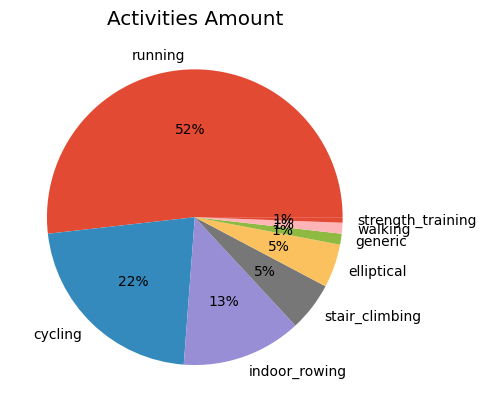

In [21]:
activities_pie = df_activities['sport'].value_counts().plot(
    kind='pie', autopct='%.0f%%',)
activities_pie.set_ylabel('')
activities_pie.set_title('Activities Amount')


<Axes: title={'center': 'Average Calories Burned per Activity'}, xlabel='sport'>

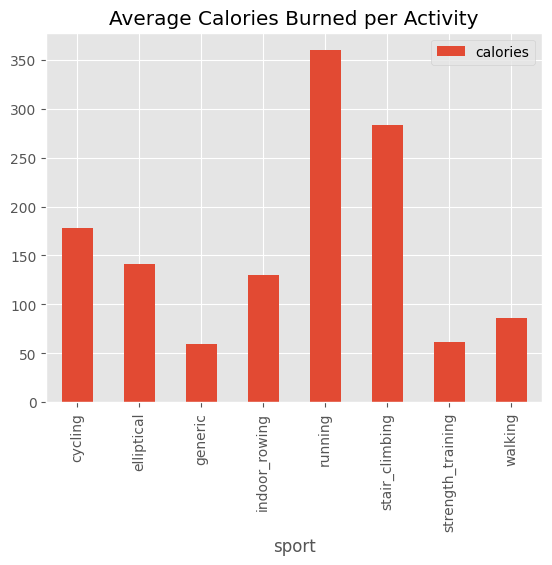

In [22]:
df_activities.groupby('sport').agg({
    'calories': 'mean'
}).plot(kind='bar', title='Average Calories Burned per Activity')


<Axes: xlabel='day_name', ylabel='calories'>

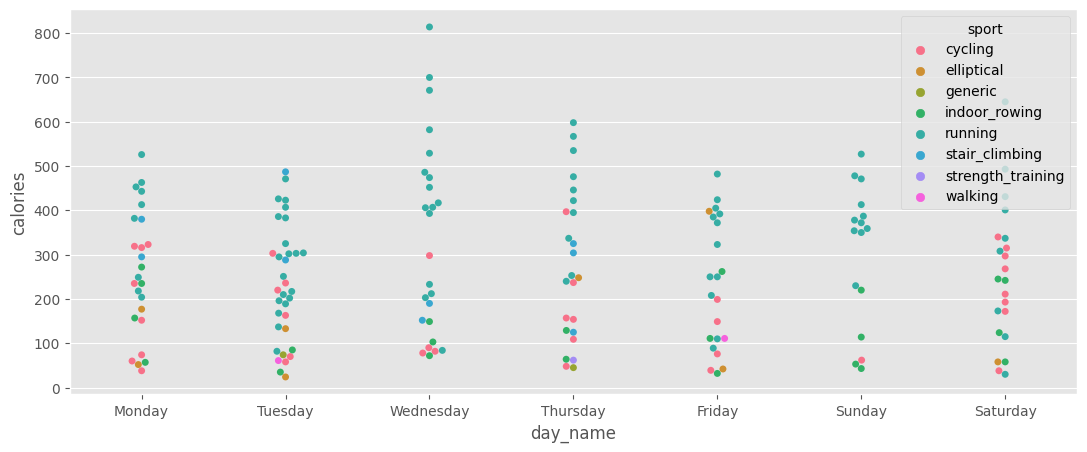

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(13, 5))

sns.swarmplot(data=df_activities, x='day_name', y='calories', hue='sport', ax=ax,)


/home/reldesn/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='day_name', ylabel='hour'>

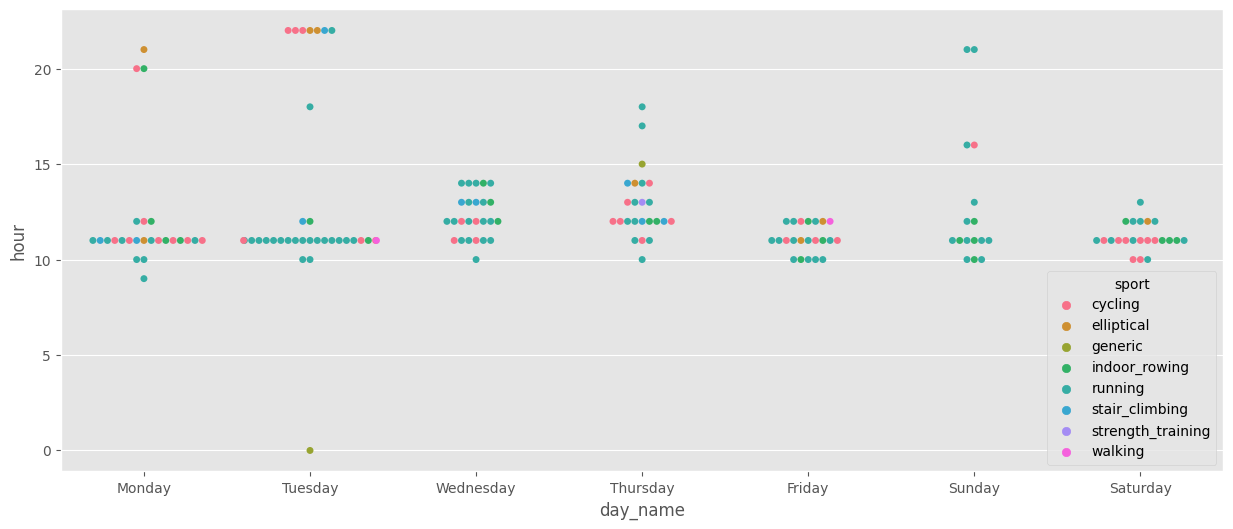

In [24]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.swarmplot(x='day_name', y='hour', data=df_activities, hue='sport', size=5)

<Axes: xlabel='week', ylabel='calories'>

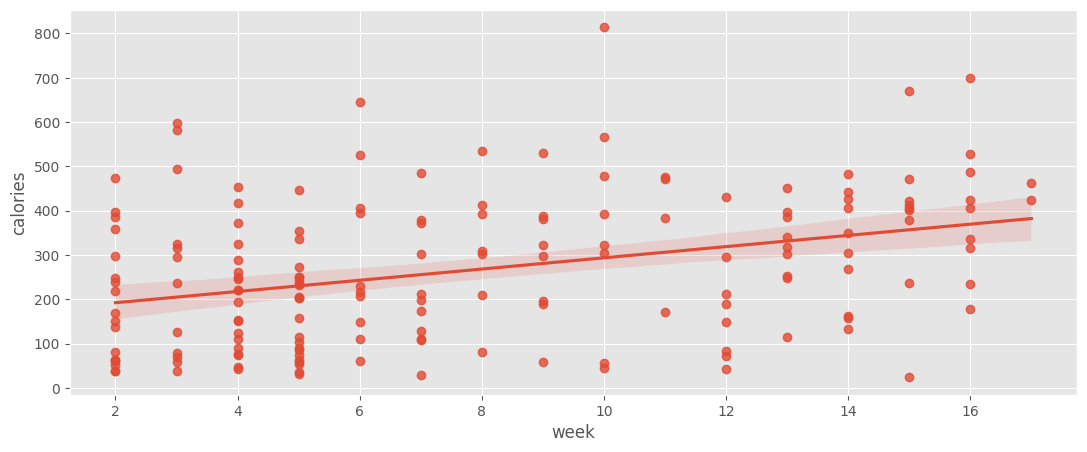

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(13, 5))

sns.regplot(data=df_activities, x='week', y='calories',)


<Axes: xlabel='week', ylabel='avg_hr'>

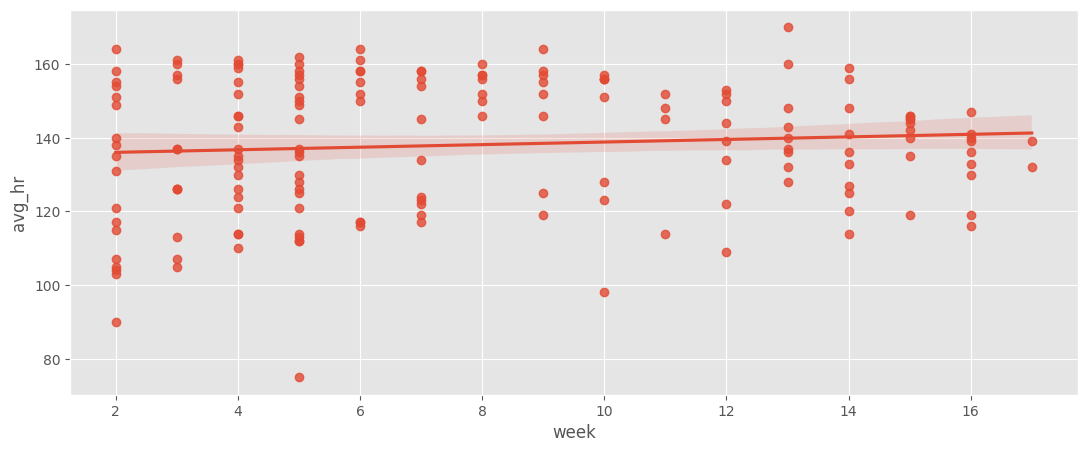

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(13, 5))

sns.regplot(data=df_activities, x='week', y='avg_hr',)


<Axes: title={'center': 'Count of Start Hour'}, ylabel='Frequency'>

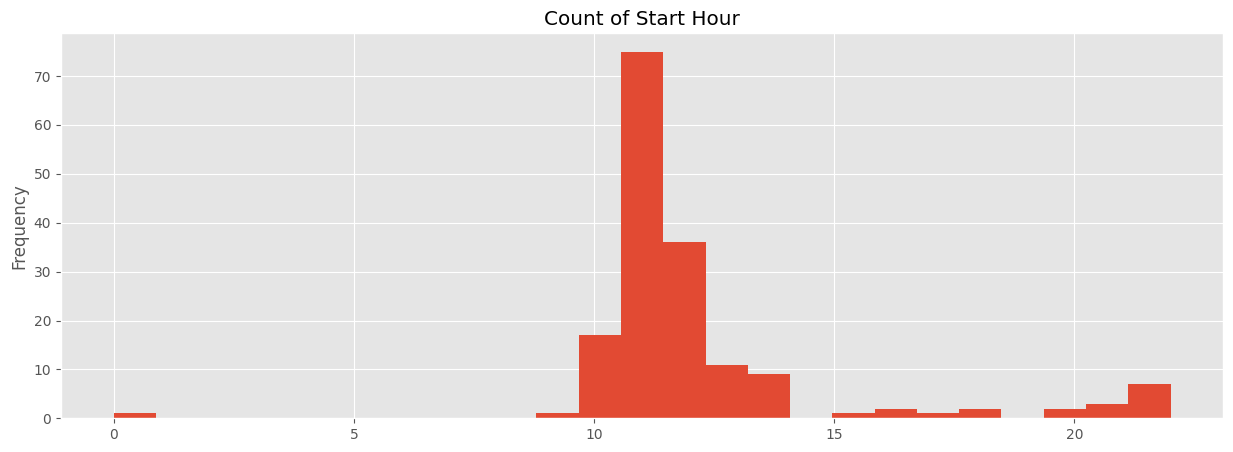

In [27]:
fig, ax1 = plt.subplots(figsize=(15, 5))

df_activities['hour'].plot(kind='hist', bins=25, title='Count of Start Hour')


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


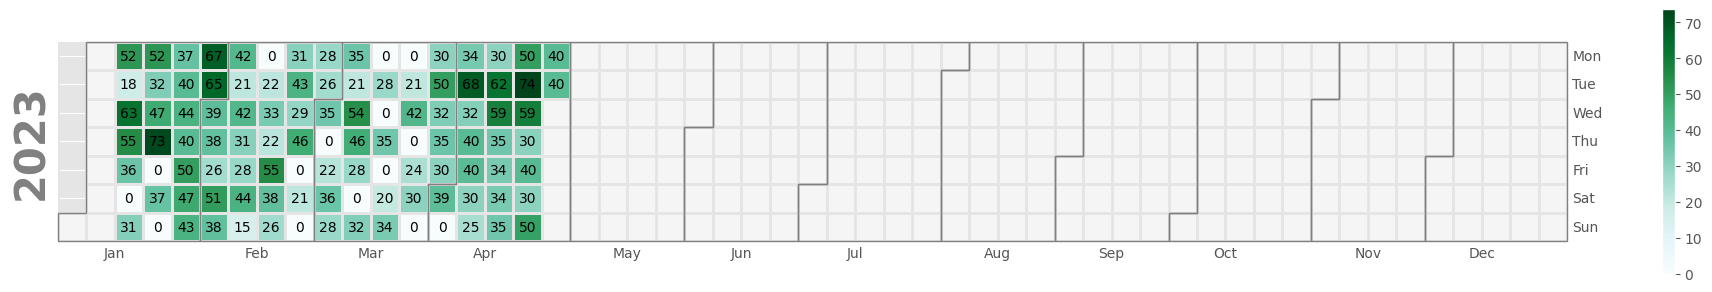

In [28]:
df__index = df_activities.set_index('start_date')
pl1 = calplot.calplot(data=df__index['total_time'], how='sum', figsize=(
    20, 3), suptitle='', textformat="{:1.0f}", cmap='BuGn', )


<Axes: xlabel='total_time', ylabel='Density'>

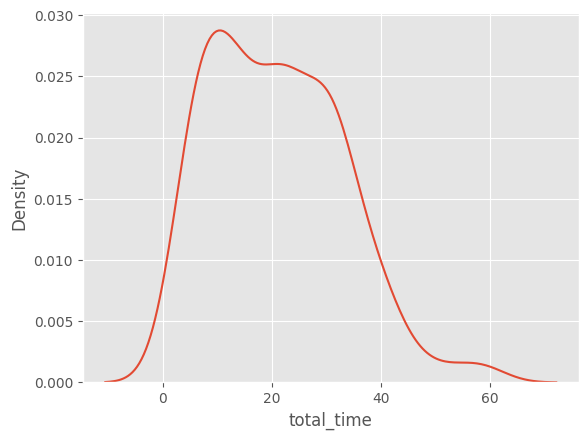

In [29]:
sns.kdeplot(data=df_activities, x='total_time')

week,5,6,7,8,9
day_name,,,,,
Friday,25.916667,27.733333,54.966667,NaN,NaN
Monday,NaN,41.683333,NaN,30.533333,27.733333
Saturday,50.933333,43.650000,38.133333,21.250000,NaN
Sunday,38.066667,14.550000,26.300000,NaN,NaN
Thursday,37.750000,31.033333,21.733333,46.283333,NaN
Tuesday,NaN,21.266667,21.533333,43.250000,26.050000
Wednesday,39.050000,41.816667,33.350000,28.700000,NaN


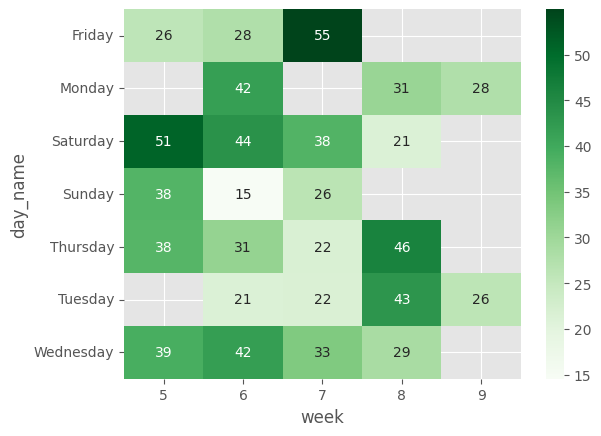

In [30]:
piv = pd.pivot_table(
    columns=df_activities['week'], values='total_time', index='day_name', aggfunc='sum', data=df_activities.loc[df_activities['month'] == 2])
sns.heatmap(piv, cmap='Greens', annot=True, )
piv


In [31]:
piv.unstack().reset_index()

,week,day_name,0
0,5,Friday,25.916667
1,5,Monday,NaN
2,5,Saturday,50.933333
3,5,Sunday,38.066667
4,5,Thursday,37.750000
5,5,Tuesday,NaN
6,5,Wednesday,39.050000
7,6,Friday,27.733333
8,6,Monday,41.683333
9,6,Saturday,43.650000


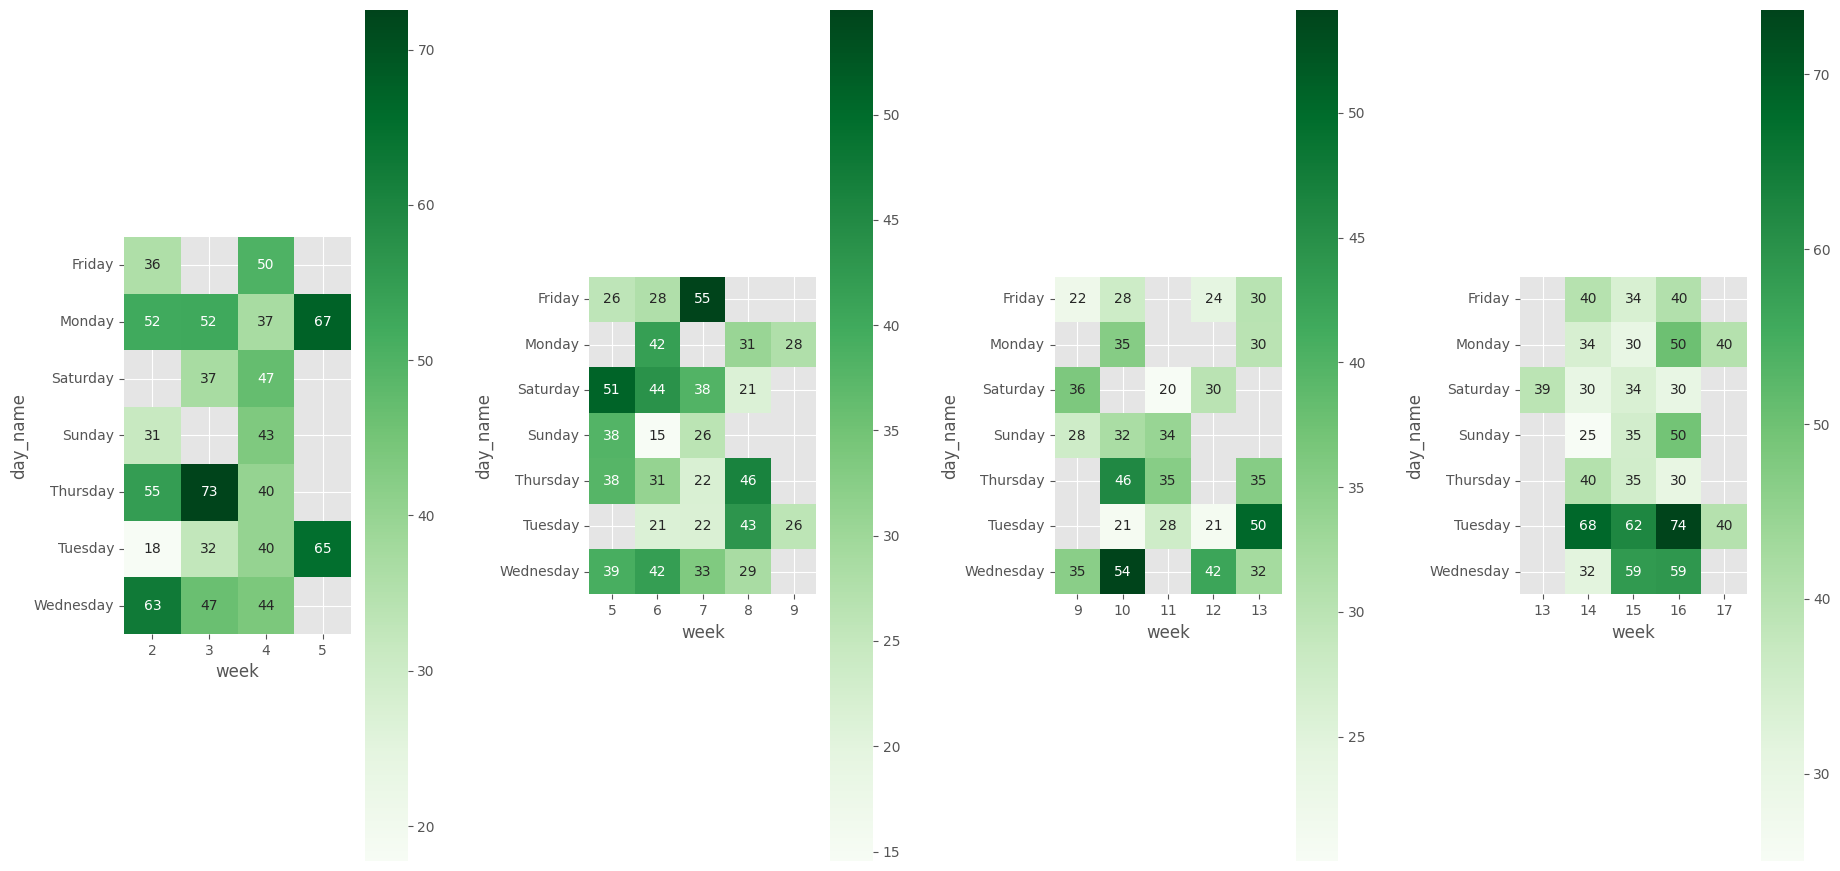

In [32]:
month_count = len(df_activities['month'].unique())
fig, ax = plt.subplots(1, month_count, figsize=(20, 20), )
fig.tight_layout(pad=10)

for i in df_activities['month'].unique():
    temp_df = df_activities.loc[df_activities['month'] == i]
    piv = pd.pivot_table(
        columns=temp_df['week'], values='total_time', index='day_name', aggfunc='sum', data=temp_df)
    sns.heatmap(piv, cmap='Greens', annot=True, ax=ax[i-1], square=True)
    
# ax[1]
# plt.show()

In [33]:
df_activities

,name,sport,training_effect,anaerobic_training_effect,start_time,stop_time,elapsed_time,distance,avg_hr,max_hr,calories,avg_cadence,max_cadence,avg_speed,max_speed,ascent,descent,start_lat,start_long,stop_lat,stop_long,start_date,hour,month,week,day_name,day_date,start_minute,start_second,start_microsecond,calpermin,total_time,work_day
0,Indoor Cycling,cycling,0.2,0.0,2023-01-09 11:14:38,2023-01-09 11:18:50.000000,2023-04-25 00:04:01.260,0.000000,107.0,121.0,38,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-09,11,1,2,Monday,9,4,1,260000,4.550898,4.016667,Work Day
1,Indoor Cycling,cycling,0.4,0.0,2023-01-09 11:19:07,2023-01-09 11:24:07.000000,2023-04-25 00:04:46.379,0.000000,121.0,127.0,60,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-09,11,1,2,Monday,9,4,46,379000,5.413534,4.766667,Work Day
2,Treadmill Running,running,2.6,0.0,2023-01-09 11:27:01,2023-01-09 11:39:21.000000,2023-04-25 00:11:54.340,0.999998,154.0,166.0,218,73.0,76.0,5.039817,6.534090,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-09,11,1,2,Monday,9,11,54,340000,12.409867,11.900000,Work Day
3,Treadmill Running,running,2.8,0.0,2023-01-09 11:39:38,2023-01-09 11:52:27.000000,2023-04-25 00:12:42.370,1.081434,164.0,173.0,249,72.0,78.0,5.106925,6.135916,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-09,11,1,2,Monday,9,12,42,370000,13.197880,12.700000,Work Day
4,Indoor Cycling,cycling,0.8,0.0,2023-01-09 20:59:26,2023-01-09 21:15:27.000000,2023-04-25 00:14:17.384,0.000000,115.0,137.0,152,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-09,20,1,2,Monday,9,14,17,384000,7.348912,14.283333,Work Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Easy Run,running,2.6,0.0,2023-04-21 10:58:56,2023-04-21 11:39:50.000000,2023-04-25 00:40:28.708,2.670001,133.0,154.0,424,66.0,97.0,3.992931,5.344040,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-21,10,4,16,Friday,21,40,28,708000,8.112245,40.466667,Work Day
165,Indoor Cycling,cycling,2.4,0.0,2023-04-22 10:15:25,2023-04-22 10:45:42.000000,2023-04-25 00:30:04.552,0.000000,130.0,166.0,315,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-22,10,4,16,Saturday,22,30,4,552000,8.022071,30.066667,Work Day
166,Goal Pace Repeats,running,3.3,0.9,2023-04-23 10:39:16,2023-04-23 11:29:13.000000,2023-04-25 00:49:30.838,3.227483,139.0,172.0,527,66.0,79.0,4.071224,5.907748,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-23,10,4,16,Sunday,23,49,30,838000,8.303571,49.500000,Work Day
167,treadmill 20 + 10,running,3.0,0.0,2023-04-24 10:54:00,2023-04-24 11:34:17.000000,2023-04-25 00:40:06.352,2.774472,139.0,157.0,463,68.0,105.0,4.151753,5.176270,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-24,10,4,17,Monday,24,40,6,352000,10.072516,40.100000,Work Day


<Axes: title={'center': 'Calories Burned Per Minute'}, xlabel='Calories', ylabel='Activity'>

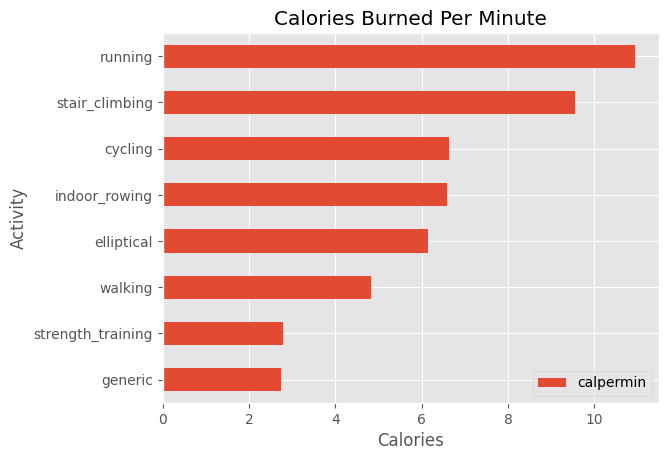

In [34]:
df_activities.groupby('sport').agg({
    'calpermin': 'mean'
}).sort_values('calpermin', ascending=True).plot(kind='barh', title='Calories Burned Per Minute', xlabel='Calories', ylabel='Activity')


<Axes: xlabel='week', ylabel='total_time'>

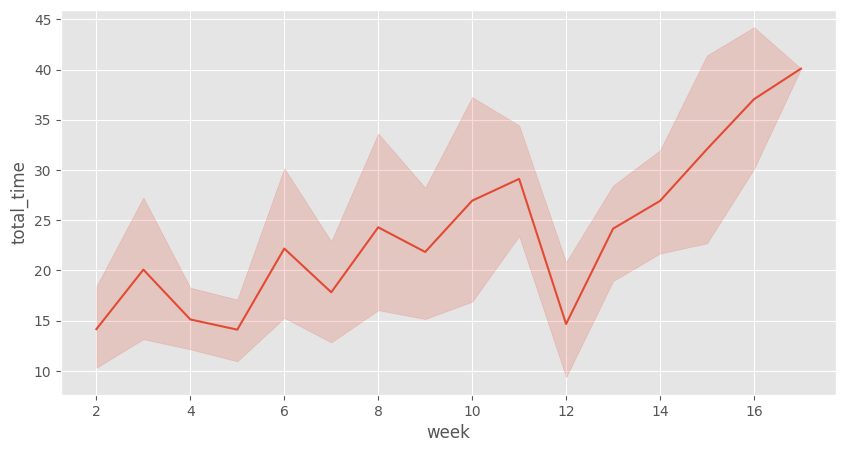

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.lineplot(data=df_activities, x='week', y='total_time')


In [36]:
df_activities['sport'].value_counts().reset_index()

,index,sport
0,running,87
1,cycling,37
2,indoor_rowing,22
3,stair_climbing,9
4,elliptical,8
5,generic,2
6,walking,2
7,strength_training,1


In [37]:
x = df_activities
x = df_activities.groupby(['work_day', 'sport']).agg({
    'total_time' : 'sum'
}).reset_index().set_index('work_day')
x
# x['work_day'].plot(kind='bar', )
# df_activities['work_day'].value_counts().plot(kind='bar', stacked=True, )
# x.plot(kind='bar', x='work_day', stacked=True)

,sport,total_time
work_day,,
Off Day,cycling,142.933333
Off Day,elliptical,20.100000
Off Day,generic,7.500000
Off Day,indoor_rowing,48.600000
Off Day,running,821.966667
Off Day,stair_climbing,83.766667
Off Day,strength_training,10.566667
Off Day,walking,0.000000
Work Day,cycling,494.150000


<Axes: xlabel='sport', ylabel='work_day'>

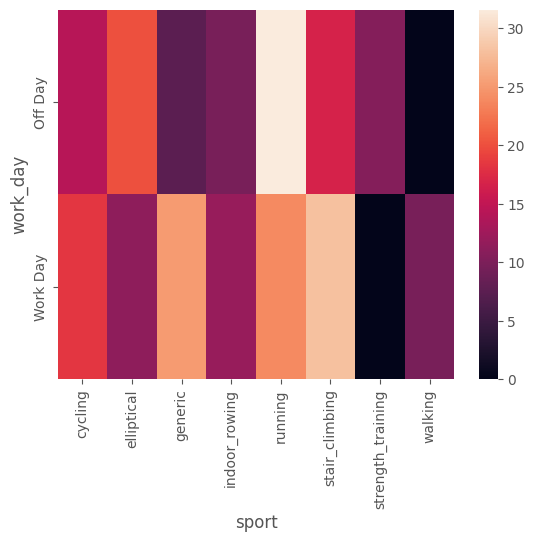

In [38]:
piv = pd.pivot_table(
    columns=df_activities['sport'], values='total_time', index='work_day', aggfunc='mean', data=df_activities).fillna(0.00)
sns.heatmap(piv, )

In [39]:
df_activities['total_time'].sum()

3522.5666666666666